## Support Vector Machine Example

This notebook takes a pair of points and creates an optimized separating line to illustrate the basics of how a Support Vector Machine mathematically generates a hyperplane which maximizes the width of the gutters on either side of the hyperplane to classify new datapoints.

The points entered into the X variable can be changed to view how changing the training data changes the separating line.

In [16]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[-1,-1],[4,1]])
y = np.array([-1, 1])

clf = SVC(C = 1e5, kernel = 'linear')
clf.fit(X, y)

print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

w =  [[0.34482759 0.13793103]]
b =  [-0.51724138]
Indices of support vectors =  [0 1]
Support vectors =  [[-1. -1.]
 [ 4.  1.]]
Number of support vectors for each class =  [1 1]
Coefficients of the support vector in the decision function =  [[0.06896552 0.06896552]]


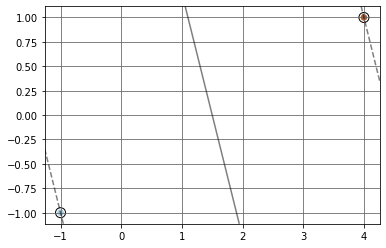

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.grid(b=True, which='major', color='#666666', linestyle='-')

plt.show()